# 1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).

 ## Densely connected layers

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# loading dataset
(train_mnist_fash_img, train_mnist_fash_label), (test_mnist_fash_img, test_mnist_fash_label) = keras.datasets.fashion_mnist.load_data()

In [2]:
# recreating model
model_densly = models.Sequential()
model_densly.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model_densly.add(layers.Dense(10, activation='softmax'))
model_densly.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [3]:
# normalazing and flattening images
train_mnist_fash_img_flat = train_mnist_fash_img.reshape((60000, 28 * 28))
train_mnist_fash_img_flat = train_mnist_fash_img_flat.astype('float32') / 255
test_mnist_fash_img_flat = test_mnist_fash_img.reshape((10000, 28 * 28))
test_mnist_fash_img_flat = test_mnist_fash_img_flat.astype('float32') / 255

# compiling model
model_densly.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# making image labels categorical
train_mnist_fash_label = to_categorical(train_mnist_fash_label)
test_mnist_fash_label = to_categorical(test_mnist_fash_label)

In [4]:
# training model
model_densly.fit(train_mnist_fash_img_flat, train_mnist_fash_label, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7469 - accuracy: 0.7448
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8553
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8750
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8805
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8908


In [5]:
train_model_loss, train_model_acc = model_densly.evaluate(train_mnist_fash_img_flat, train_mnist_fash_label)
test_model_loss, test_model_acc = model_densly.evaluate(test_mnist_fash_img_flat, test_mnist_fash_label)

print(f'Train model accuracy: {round(train_model_acc, 3)}')
print(f'Test model accuracy: {round(test_model_acc, 3)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8527
Train model accuracy: 0.881
Test model accuracy: 0.853


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


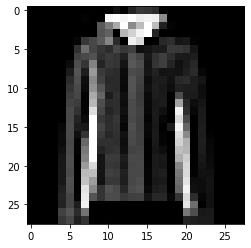

In [6]:
predictions = model_densly.predict(test_mnist_fash_img_flat[:10])
img_num = 6
print(test_mnist_fash_label[img_num])
plt.imshow(test_mnist_fash_img[img_num], cmap=plt.get_cmap('gray'))
plt.show()

### As you can see model classified coat as a coat

## Convolutional layers


In [7]:
# making model
model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(64, activation='relu'))
model_conv.add(layers.Dense(10, activation='softmax'))

In [8]:
# normalazing, flattening and reshaping images
train_mnist_fash_img_conv = train_mnist_fash_img.reshape((60000, 28, 28, 1))
train_mnist_fash_img_conv = train_mnist_fash_img_conv.astype('float32') / 255
test_mnist_fash_img_conv = test_mnist_fash_img.reshape((10000, 28, 28, 1))
test_mnist_fash_img_conv = test_mnist_fash_img_conv.astype('float32') / 255

In [9]:
# compiling model
model_conv.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#training model
model_conv.fit(train_mnist_fash_img_conv, train_mnist_fash_label, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.7751 - accuracy: 0.7131
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3409 - accuracy: 0.8767
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2827 - accuracy: 0.8962
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2536 - accuracy: 0.9070
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2212 - accuracy: 0.9184
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2070 - accuracy: 0.9224
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1866 - accuracy: 0.9309
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1718 - accuracy: 0.9374
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1621 - accuracy: 0.9409
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1447 - accuracy: 0.9463

In [11]:
train_model_conv_loss, train_model_conv_acc = model_conv.evaluate(train_mnist_fash_img_conv, train_mnist_fash_label)
test_model_conv_loss, test_model_conv_acc = model_conv.evaluate(test_mnist_fash_img_conv, test_mnist_fash_label)

print(f'Train model conv accuracy: {round(train_model_conv_acc, 3)}')
print(f'Test model conv accuracy: {round(test_model_conv_acc, 3)}')
print(f'Train model accuracy: {round(train_model_acc, 3)}')
print(f'Test model accuracy: {round(test_model_acc, 3)}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2932 - accuracy: 0.9105
Train model conv accuracy: 0.952
Test model conv accuracy: 0.91
Train model accuracy: 0.881
Test model accuracy: 0.853


# 2. Improve the architecture. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy! Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

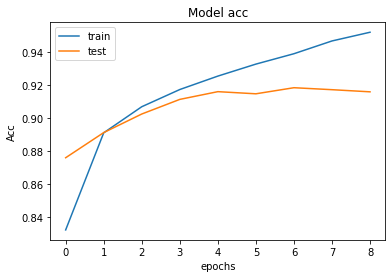

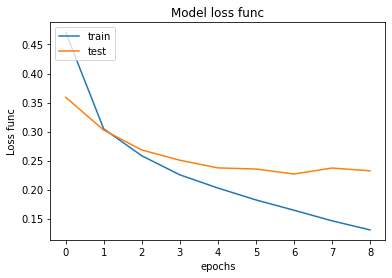

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
model_stop = models.Sequential()
model_stop.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_stop.add(layers.MaxPooling2D((2, 2)))
model_stop.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_stop.add(layers.Flatten())
model_stop.add(layers.Dense(64, activation='relu'))
model_stop.add(layers.Dense(10, activation='softmax'))

model_stop.summary(line_length=None, positions=None, print_fn=None)


model_stop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


epochs = 30
batch_size = 128
trained_model_stop = model_stop.fit(train_mnist_fash_img_conv, train_mnist_fash_label, 
                                    epochs=epochs, batch_size=batch_size, 
validation_data=(test_mnist_fash_img_conv, test_mnist_fash_label), 
callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)])

model_history = trained_model_stop
# Model acc plot
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss function plot
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss func')
plt.ylabel('Loss func')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
train_model_early_loss, train_model_early_acc = model_stop.evaluate(train_mnist_fash_img_conv, train_mnist_fash_label)
test_model_early_loss, test_model_early_acc = model_stop.evaluate(test_mnist_fash_img_conv, test_mnist_fash_label)

print(f'Train model accuracy: {round(train_model_acc, 3)}')
print(f'Test model accuracy: {round(test_model_acc, 3)}')
print(f'Train model conv accuracy: {round(train_model_conv_acc, 3)}')
print(f'Test model conv accuracy: {round(test_model_conv_acc, 3)}')

print(f'My new model train accuracy: {round(train_model_early_acc, 3)}')
print(f'My new model test accuracy: {round(test_model_early_acc, 3)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2324 - accuracy: 0.9160
Train model accuracy: 0.881
Test model accuracy: 0.853
Train model conv accuracy: 0.952
Test model conv accuracy: 0.91
My new model train accuracy: 0.963
My new model test accuracy: 0.916


In [14]:
print(f'My models is {round(test_model_early_acc-test_model_conv_acc, 4)} more/less accurate on test dataset')

My models is 0.0055 more accurate on test dataset


# By deleting 2 layers from the initial CNN and applying early stopping I was able to create a more accurate model that performs better on test dataset